# Q1...........

## Part (a) reads and displays the two images side by side.

In [3]:
# import Liberies
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Read the images
img1 = cv.imread('river1.jpg')
img2 = cv.imread('river2.jpg')
img_rgb1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img_rgb2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

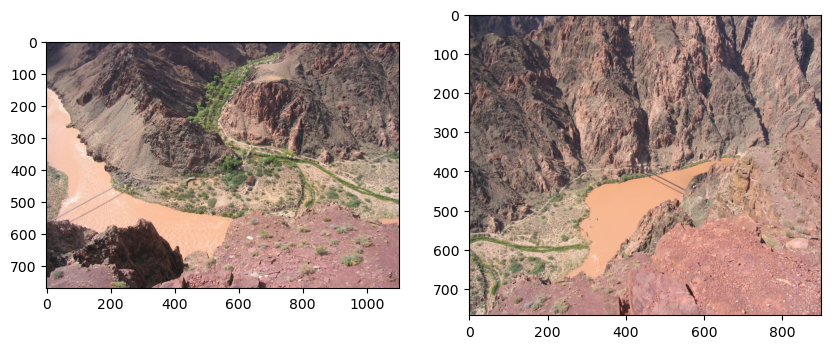

In [5]:
# Resize the images
img1_resized = cv.resize(img_rgb1, (1100, img_rgb1.shape[0]))  # Resize img1 to 1000 width, keeping height same
img2_resized = cv.resize(img_rgb2, (900, img_rgb2.shape[0]))    # Resize img2 to 800 width, keeping height same
# Display the images Horizontally
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img1_resized)
plt.subplot(1, 2, 2)
plt.imshow(img2_resized)
plt.show()

## Part (b) applies SIFT (Scale-Invariant Feature Transform) to both images and counts the detected keypoints.

Number of SIFT features in img1: 8618
Number of SIFT features in img2: 9081


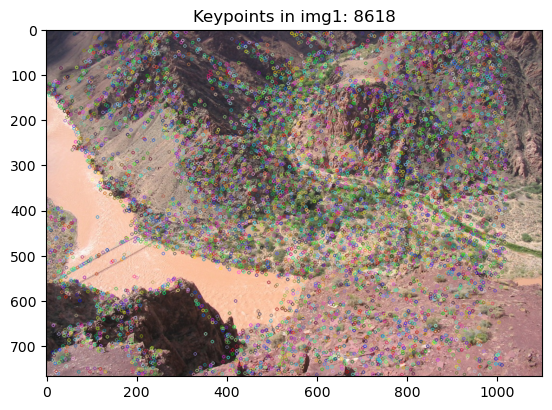

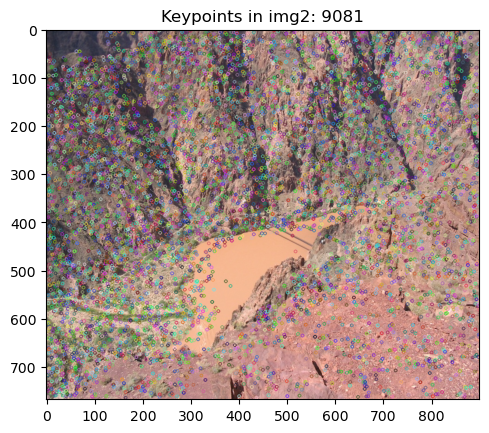

In [7]:
# Initialize SIFT detector
sift = cv.SIFT_create()

# Detect and compute SIFT features for both images
kp1, des1 = sift.detectAndCompute(img_rgb1, None)
kp2, des2 = sift.detectAndCompute(img_rgb2, None)

# Print the number of features detected
print("Number of SIFT features in img1:", len(kp1))
print("Number of SIFT features in img2:", len(kp2))

# Optionally, draw the keypoints on the images to visualize them
img1_keypoints = cv.drawKeypoints(img1_resized, kp1, None)
img2_keypoints = cv.drawKeypoints(img2_resized, kp2, None)

plt.imshow(img1_keypoints)
plt.title(f'Keypoints in img1: {len(kp1)}')
plt.show()

plt.imshow(img2_keypoints)
plt.title(f'Keypoints in img2: {len(kp2)}')
plt.show()

## Part (c) uses a Brute-Force Matcher to find and display matching features between the two images.

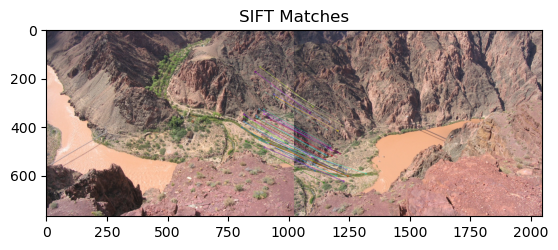

In [9]:
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)

# Match descriptors from both images
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)  # Sort matches by distance

# Draw matches on the images
matched_img = cv.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(cv.cvtColor(matched_img, cv.COLOR_BGR2RGB))
plt.title('SIFT Matches')
plt.show()

## Part (d) uses matched keypoints to compute the homography matrix. This matrix is used to warp img2 so it aligns with img1. Finally, img1 and the warped img2 are blended and displayed.

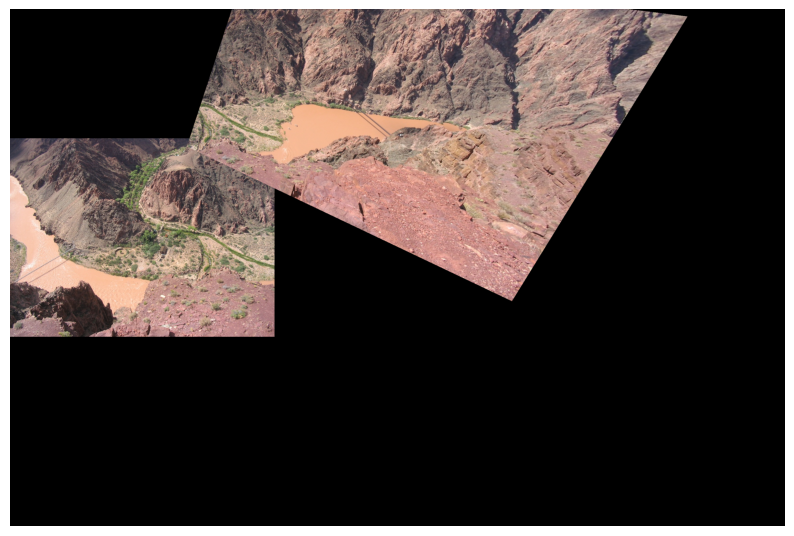

In [11]:
trans_x = 0
trans_y = 500
trans = np.float32([[1, 0, trans_x], [0, 1, trans_y], [0, 0, 1]])
# Output mosaic
out = np.zeros((2000,3000,3),dtype=np.uint8)
out = cv.warpPerspective(img1, trans, (3000, 2000), out, borderMode=cv.BORDER_TRANSPARENT)

# Select top N matches (e.g., top 50)
good_matches = matches[:50]

# Extract the matched keypoints from the good matches
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
# Find the homography matrix using RANSAC
homography, mask = cv.findHomography(pts2, pts1, cv.RANSAC, 5.0)

# Warp img2 onto the output canvas using the homography
warped_img2 = cv.warpPerspective(img2, homography, (out.shape[1], out.shape[0]), dst=out, borderMode=cv.BORDER_TRANSPARENT)

# Convert the warped result to RGB for displaying with matplotlib
warped_img2_rgb = cv.cvtColor(warped_img2, cv.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(warped_img2_rgb)
plt.axis('off')  # Hide axes
plt.show()

## E) Use K-means clustering to segment an image into different color regions. Explain how K-means helps in image segmentation. Show the output in one row

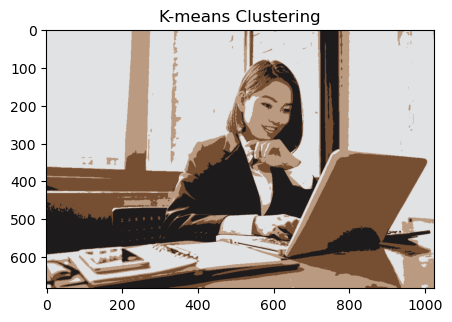

In [23]:
Z = image3_rgb.reshape((-1, 3))
Z = np.float32(Z)
K = 4  # Number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()].reshape(image3_rgb.shape)

# Display K-means segmentation
plt.figure(figsize=(5, 5))
plt.imshow(segmented_image)
plt.title('K-means Clustering')
plt.show()

In [24]:
# Explanation:
# K-means clustering groups similar color pixels together by minimizing within-cluster variance,
# effectively segmenting the image into distinct color regions based on their intensities or colors.

## F) Detect and visualize keypoints in an image using SIFT. Show the output in one row.